In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from scipy.stats.mstats import winsorize

In [62]:
df = pd.read_csv("../data/laptop_prices.csv")

In [63]:
# Mostrar los primeros 5 registros del DataFrame
print("Primeros 5 registros del DataFrame:")
df.head()

Primeros 5 registros del DataFrame:


,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [64]:
# Mostrar información del DataFrame
print("Información del DataFrame:")
df.info()

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 

In [65]:
# Mostrar los tipos de datos
print("Tipos de datos en cada columna:")
print(df.dtypes)

Tipos de datos en cada columna:
Company                  object
Product                  object
TypeName                 object
Inches                  float64
Ram                       int64
OS                       object
Weight                  float64
Price_euros             float64
Screen                   object
ScreenW                   int64
ScreenH                   int64
Touchscreen              object
IPSpanel                 object
RetinaDisplay            object
CPU_company              object
CPU_freq                float64
CPU_model                object
PrimaryStorage            int64
SecondaryStorage          int64
PrimaryStorageType       object
SecondaryStorageType     object
GPU_company              object
GPU_model                object
dtype: object


In [66]:
# Mostrar estadísticas descriptivas generales
print("Estadísticas descriptivas generales:")
df.describe()

Estadísticas descriptivas generales:


,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [67]:
# Mostrar valores nulos de cada columna
print("Conteo de valores nulos por columna:")
df.isnull().sum()

Conteo de valores nulos por columna:


Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

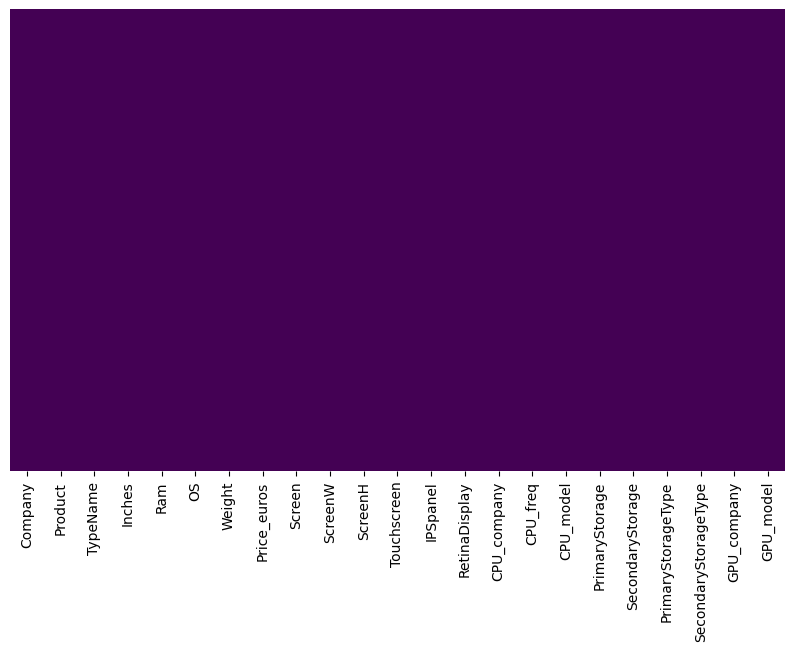

In [68]:
# Visualización de valores nulos
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

In [69]:
# Seleccionar las columnas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Columnas numéricas:", numerical_columns)

# Seleccionar las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
print("Columnas categóricas:", categorical_columns)

Columnas numéricas: Index(['Inches', 'Ram', 'Weight', 'Price_euros', 'ScreenW', 'ScreenH',
       'CPU_freq', 'PrimaryStorage', 'SecondaryStorage'],
      dtype='object')
Columnas categóricas: Index(['Company', 'Product', 'TypeName', 'OS', 'Screen', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_model',
       'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company',
       'GPU_model'],
      dtype='object')


In [ ]:
# Detectar valores atípicos en el las variables numéricas
for col in numerical_columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

  print(f"Cantidad de valores atípicos en {col}: {len(outliers)}")

Cantidad de valores atípicos en Inches: 37
Cantidad de valores atípicos en Ram: 219
Cantidad de valores atípicos en Weight: 45
Cantidad de valores atípicos en Price_euros: 28
Cantidad de valores atípicos en ScreenW: 437
Cantidad de valores atípicos en ScreenH: 442
Cantidad de valores atípicos en CPU_freq: 2
Cantidad de valores atípicos en PrimaryStorage: 256
Cantidad de valores atípicos en SecondaryStorage: 208


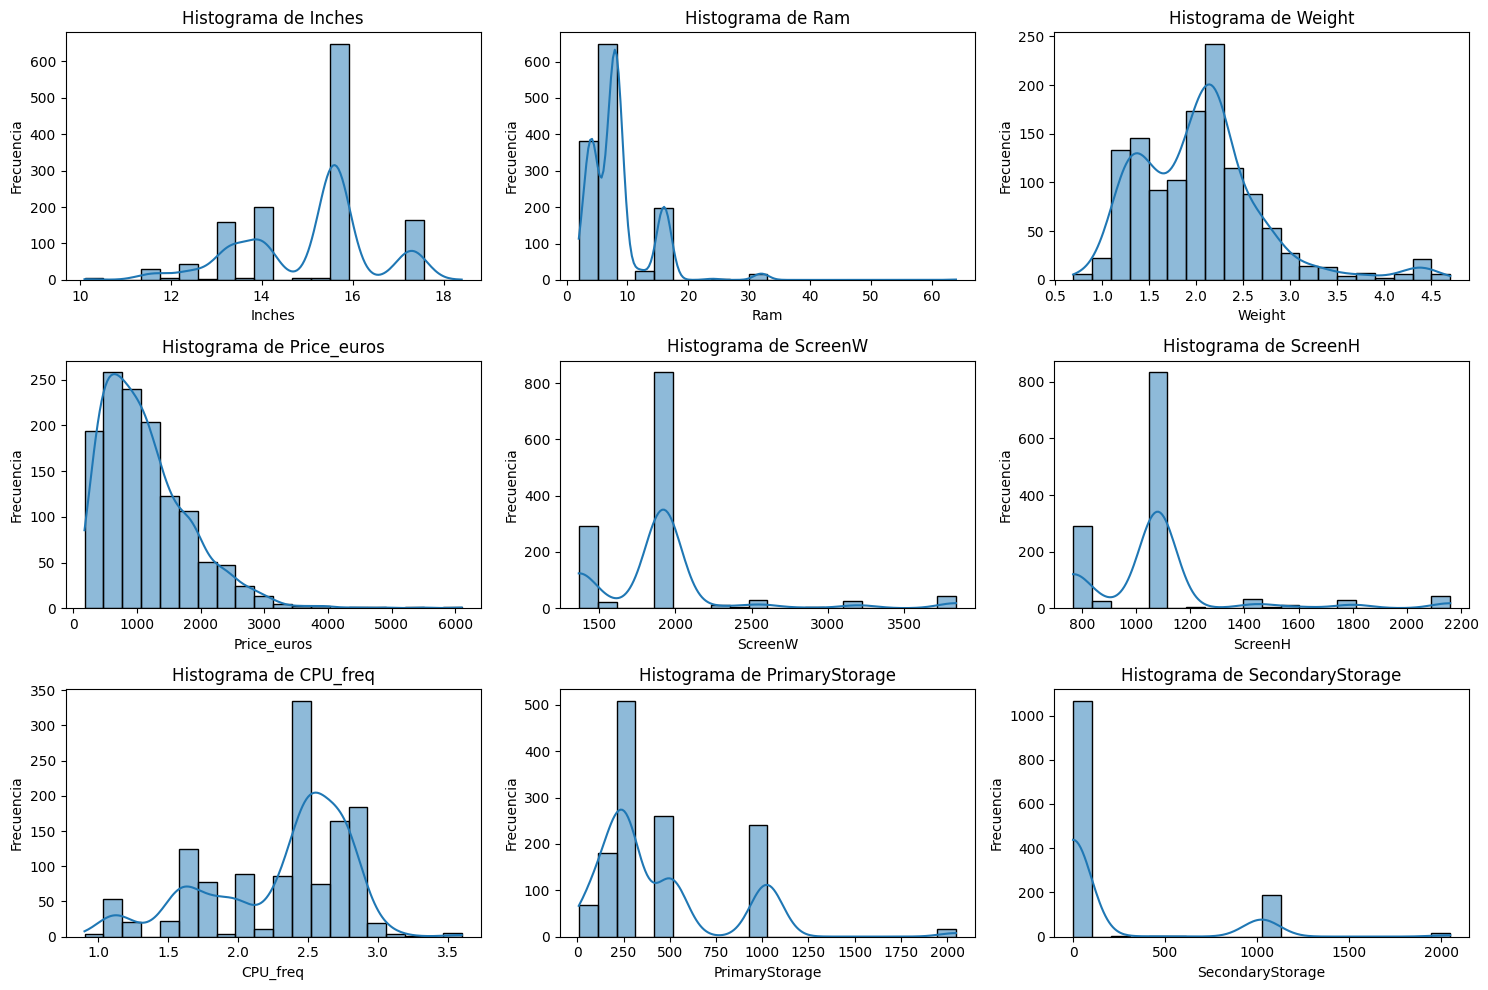

In [71]:
# Histograma de las variables numéricas

# Crear un histograma para cada columna numérica
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
  plt.subplot(3, 3, i)
  sns.histplot(df[col], bins=20, kde=True)
  plt.title(f'Histograma de {col}')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  
plt.tight_layout()
plt.show()

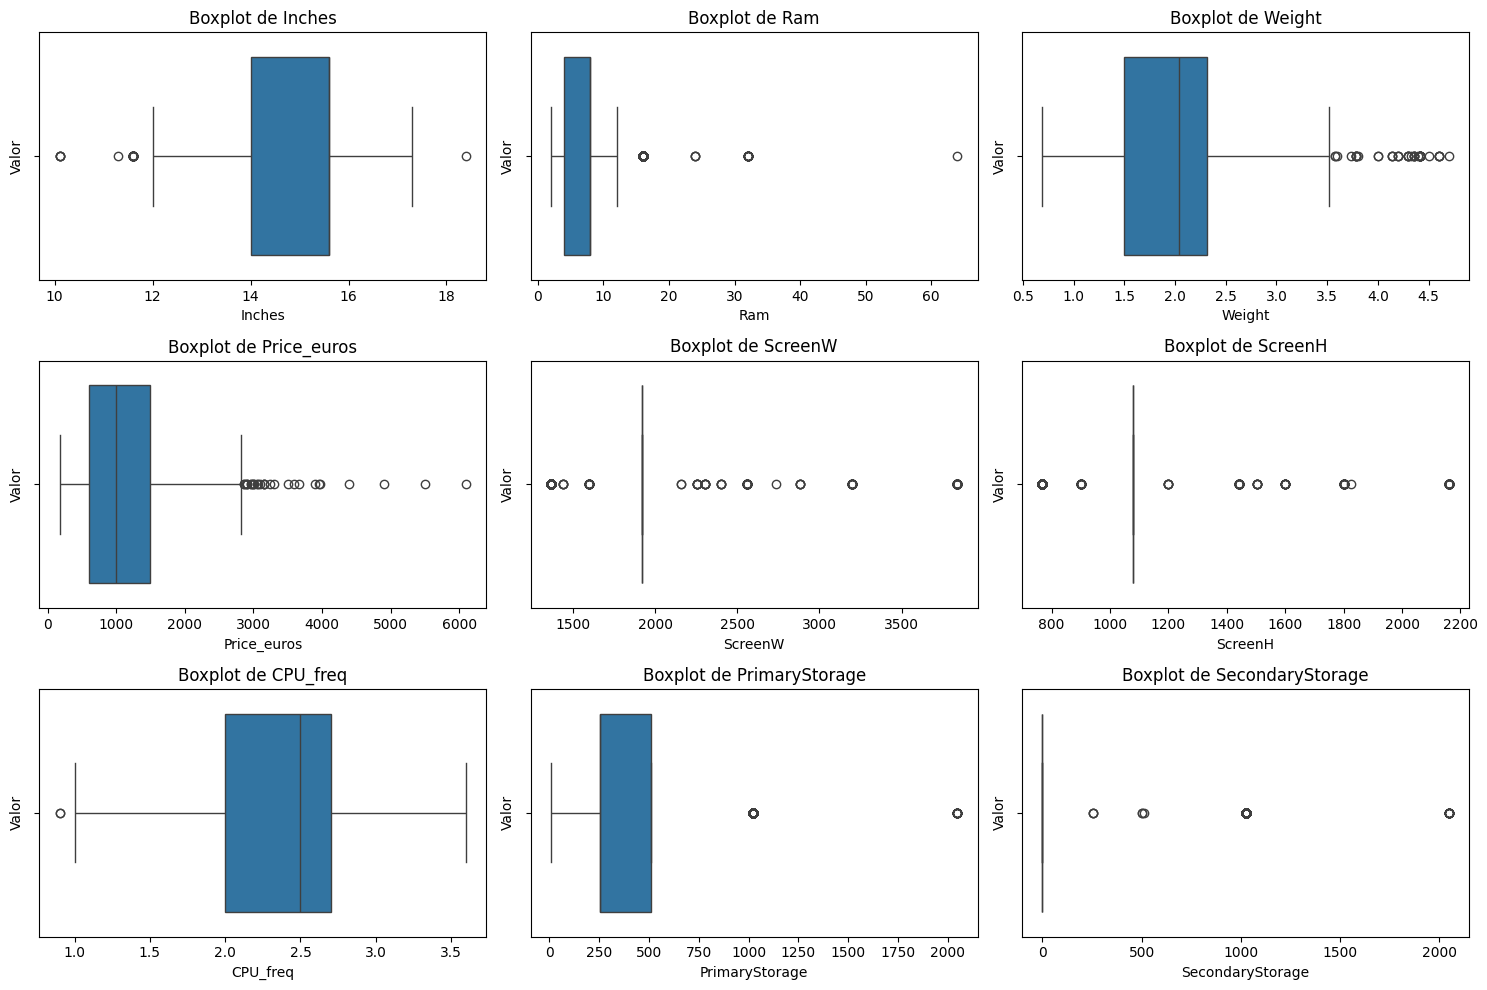

In [72]:
# Boxplots para detectar outliers

# Crear un boxplot para cada columna numérica
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
  plt.subplot(3, 3, i)
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot de {col}')
  plt.xlabel(col)
  plt.ylabel('Valor')

plt.tight_layout()
plt.show()

In [73]:
# Tratar valores atípicos en las variables numéricas
df_cleaned = df.copy()

# Eliminar valores atípicos usando el método IQR
for col in numerical_columns:
  Q1 = df_cleaned[col].quantile(0.25)
  Q3 = df_cleaned[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(f"Filas originales: {len(df)}")
print(f"Filas después de eliminar outliers: {len(df_cleaned)}")

Filas originales: 1275
Filas después de eliminar outliers: 628


In [74]:
# Información del DataFrame limpio
print("Información del DataFrame limpio:")
df_cleaned.info()

Información del DataFrame limpio:
<class 'pandas.core.frame.DataFrame'>
Index: 628 entries, 1 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               628 non-null    object 
 1   Product               628 non-null    object 
 2   TypeName              628 non-null    object 
 3   Inches                628 non-null    float64
 4   Ram                   628 non-null    int64  
 5   OS                    628 non-null    object 
 6   Weight                628 non-null    float64
 7   Price_euros           628 non-null    float64
 8   Screen                628 non-null    object 
 9   ScreenW               628 non-null    int64  
 10  ScreenH               628 non-null    int64  
 11  Touchscreen           628 non-null    object 
 12  IPSpanel              628 non-null    object 
 13  RetinaDisplay         628 non-null    object 
 14  CPU_company           628 non-null    object

In [75]:
# Mostrar los tipos de datos del DataFrame limpio
print("Tipos de datos en cada columna:")
print(df_cleaned.dtypes)

Tipos de datos en cada columna:
Company                  object
Product                  object
TypeName                 object
Inches                  float64
Ram                       int64
OS                       object
Weight                  float64
Price_euros             float64
Screen                   object
ScreenW                   int64
ScreenH                   int64
Touchscreen              object
IPSpanel                 object
RetinaDisplay            object
CPU_company              object
CPU_freq                float64
CPU_model                object
PrimaryStorage            int64
SecondaryStorage          int64
PrimaryStorageType       object
SecondaryStorageType     object
GPU_company              object
GPU_model                object
dtype: object


In [76]:
# Mostrar estadísticas descriptivas generales del DataFrame limpio
print("Estadísticas descriptivas generales:")
df_cleaned.describe()

Estadísticas descriptivas generales:


,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.0
mean,14.652548,6.363057,1.810763,960.199156,1777.041401,1004.210191,2.235987,291.789809,0.0
std,1.162208,2.050877,0.428315,465.584129,272.435840,162.278927,0.466874,138.699291,0.0
min,12.000000,2.000000,0.810000,196.000000,1366.000000,768.000000,1.100000,16.000000,0.0
25%,14.000000,4.000000,1.450000,589.750000,1366.000000,768.000000,1.800000,256.000000,0.0
50%,15.600000,8.000000,1.860000,913.000000,1920.000000,1080.000000,2.450000,256.000000,0.0
75%,15.600000,8.000000,2.162500,1270.750000,1920.000000,1080.000000,2.500000,500.000000,0.0
max,17.300000,12.000000,3.140000,2135.000000,2560.000000,1504.000000,3.000000,512.000000,0.0


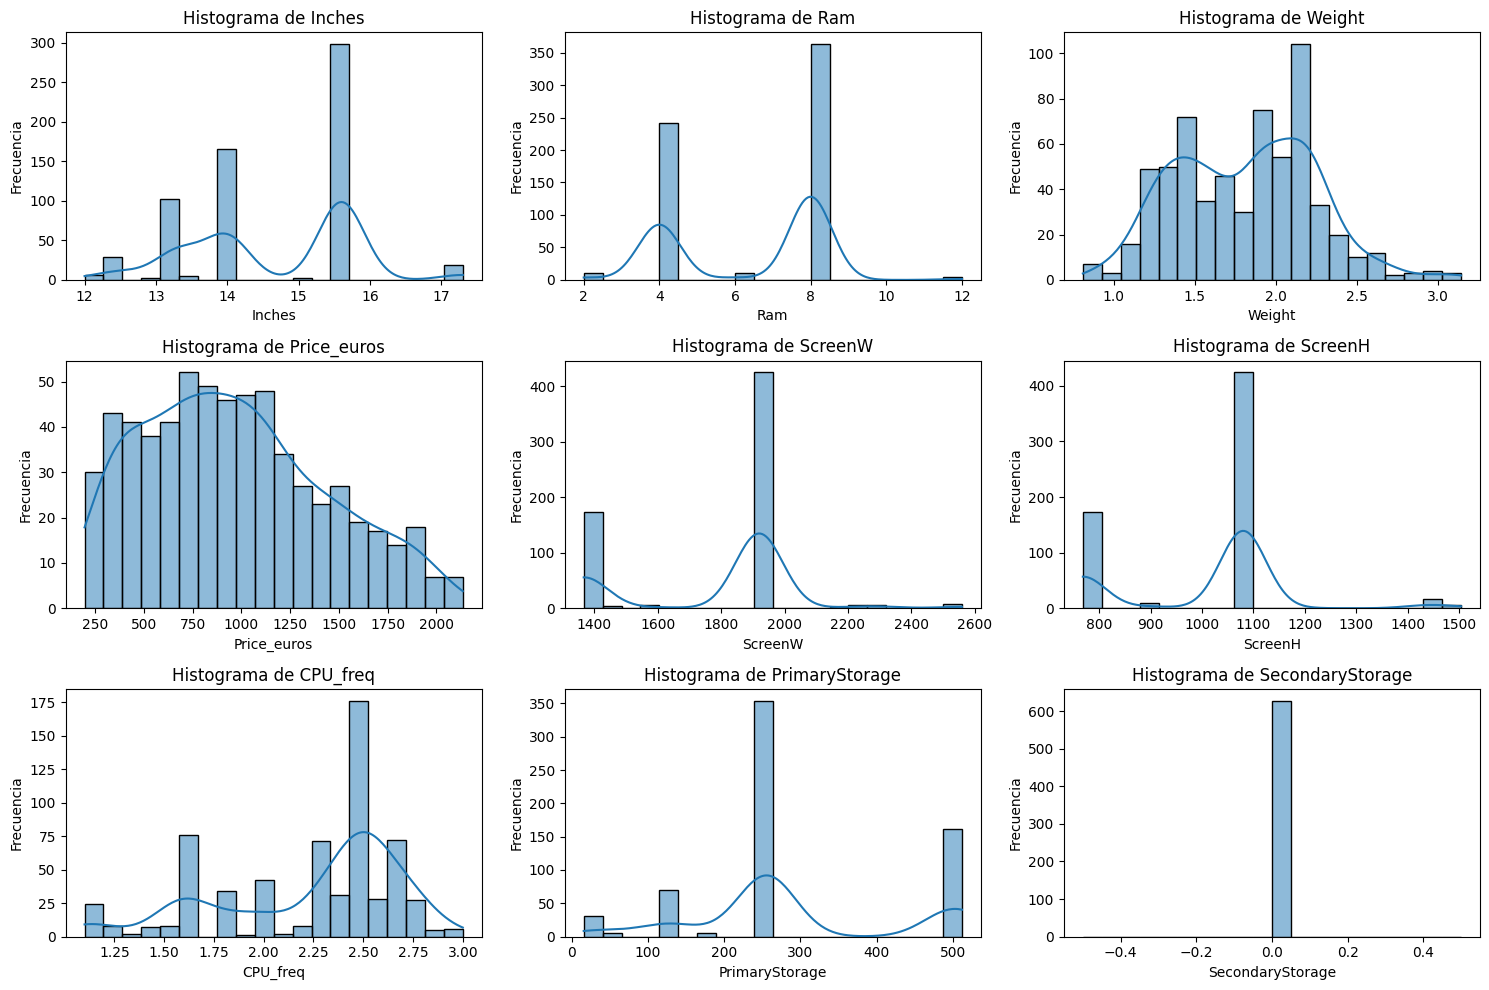

In [77]:
# Histograma de las variables numéricas

# Crear un histograma para cada columna numérica
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
  plt.subplot(3, 3, i)
  sns.histplot(df_cleaned[col], bins=20, kde=True)
  plt.title(f'Histograma de {col}')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  
plt.tight_layout()
plt.show()

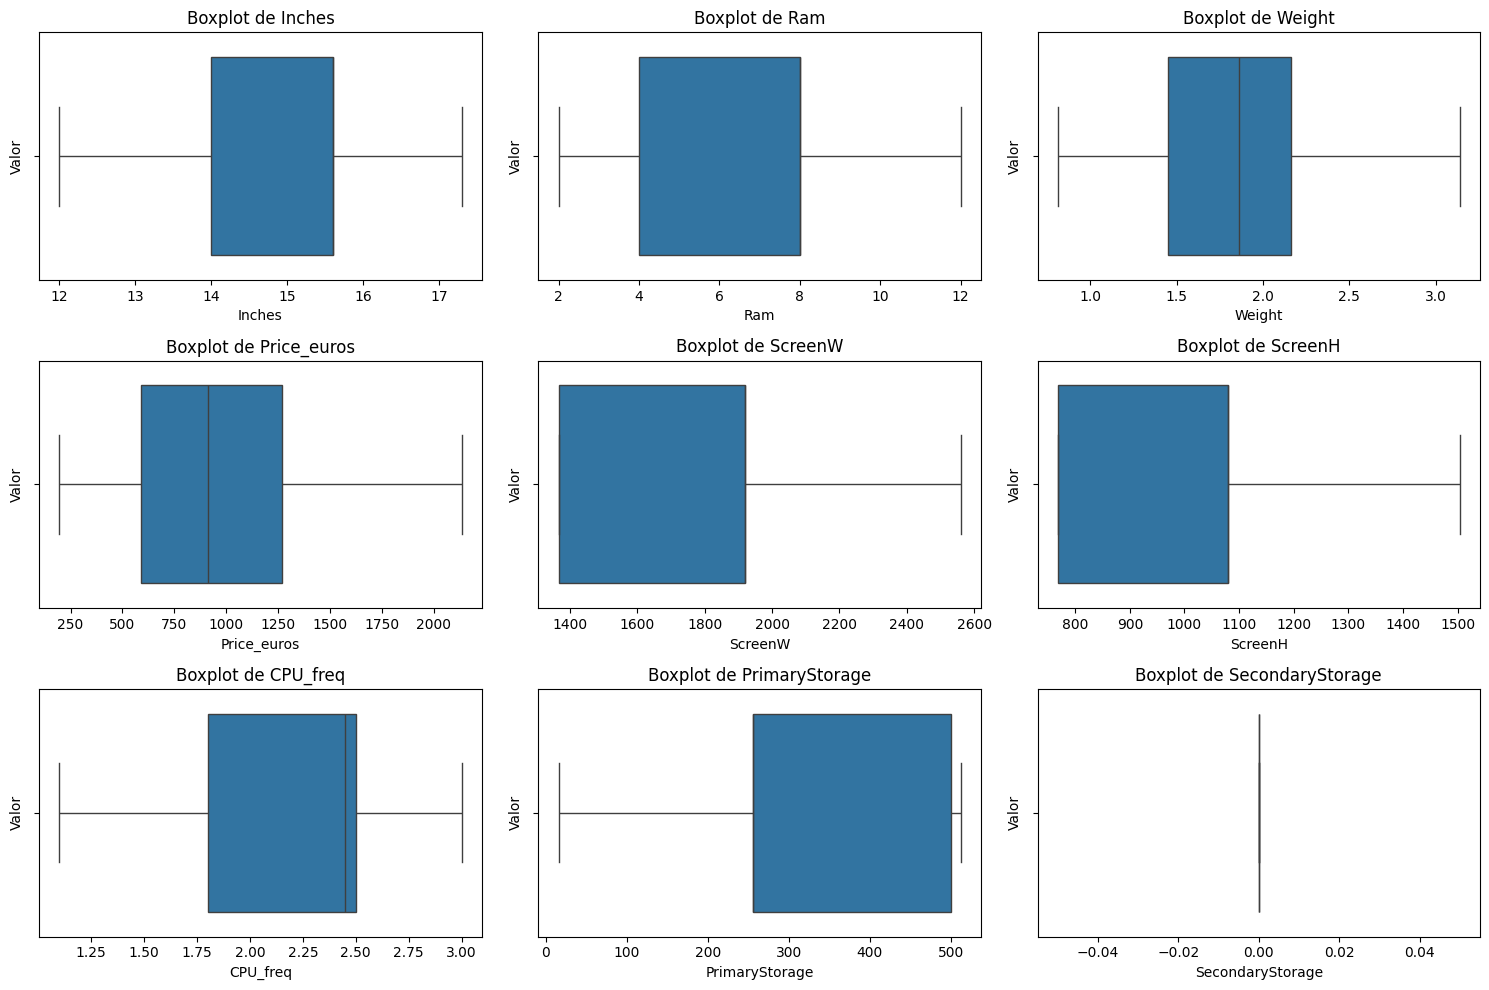

In [78]:
# Boxplots para detectar outliers

# Crear un boxplot para cada columna numérica
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
  plt.subplot(3, 3, i)
  sns.boxplot(x=df_cleaned[col])
  plt.title(f'Boxplot de {col}')
  plt.xlabel(col)
  plt.ylabel('Valor')

plt.tight_layout()
plt.show()

In [79]:
# Imputación de valores faltantes

# Imputar valores faltantes en columnas numéricas con la media
num_imputer = SimpleImputer(strategy='mean')
df_cleaned[numerical_columns] = num_imputer.fit_transform(df_cleaned[numerical_columns])

# Imputar valores faltantes en columnas categóricas con la moda
cat_imputer = SimpleImputer(strategy='most_frequent')
df_cleaned[categorical_columns] = cat_imputer.fit_transform(df_cleaned[categorical_columns])

# Eliminar columnas irrelevantes para el modelo
df_cleaned.drop(columns=['Product', 'CPU_model', 'GPU_model'], inplace=True)

# Transformar variables categoricas en variables dummy
df_cleaned = pd.get_dummies(df_cleaned, drop_first=True)

df_cleaned.head()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Company_Apple,...,Screen_Standard,Touchscreen_Yes,IPSpanel_Yes,RetinaDisplay_Yes,CPU_company_Intel,PrimaryStorageType_HDD,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD,GPU_company_Intel,GPU_company_Nvidia
1,13.3,8.0,1.34,898.94,1440.0,900.0,1.8,128.0,0.0,True,...,True,False,False,False,True,False,False,False,True,False
2,15.6,8.0,1.86,575.00,1920.0,1080.0,2.5,256.0,0.0,False,...,False,False,False,False,True,False,False,True,True,False
5,15.6,4.0,2.10,400.00,1366.0,768.0,3.0,500.0,0.0,False,...,True,False,False,False,False,True,False,False,False,False
7,13.3,8.0,1.34,1158.70,1440.0,900.0,1.8,256.0,0.0,True,...,True,False,False,False,True,False,False,False,True,False
9,14.0,8.0,1.60,770.00,1920.0,1080.0,1.6,256.0,0.0,False,...,False,False,True,False,True,False,False,True,True,False


In [80]:
# Guardar los datos preprocesados
df_cleaned.to_csv("../data/laptop_prices_preprocessed.csv", index=False)
print("Datos preprocesados guardados en 'laptop_prices_preprocessed.csv'")

Datos preprocesados guardados en 'laptop_prices_preprocessed.csv'
